# Create synthetic dataset for training

The `create_dataset` creates a split data set for training, validation (or development) and testing. It's not optimized, and takes about 4-5 hours on Google Colab to finished.

Please note that evaluation on synthetic validation or test does not report realistic performance, make sure to use real data instead. However, the two performance gaps between performance measured on

 * synthetic training data,
 * synthetic validation or test data, and
 * real test data,

denote error due to 

 * overfitting, respectively
 * suboptimal realism of the synthetic data. 

If the synthetic test performance is worse than realistic test performance, this would indicate the synthetic data is tougher than the realistic data, for example due to unrealistic variations allowed by synthetic data.

This notebook illustrates creating a random data set.

This notebook was tested on Google Colab.

In [5]:
#@markdown # Configuration, dependencies and imports
import os
import sys
import numpy
import warnings
from importlib import reload

platform = 'unknown'
try:
  from google import colab
  platform = 'google-colab'
except ImportError:
  if os.path.exists('/slow-data/yeastcells/data/'):
    platform = 'cit-gpu-machine'

force_reinstall = False #@param {"type": "boolean"}
synthetic_data_path = "" #@param {"type":"string"}


if platform == 'cit-gpu-machine':
  synthetic_data_path = synthetic_data_path or '/slow-data/yeastcells/data/synthetic/clean/'
  if f'{git_repositories_path}/yeastcells-detection-maskrcnn/' not in sys.path:
    sys.path.append(f'{git_repositories_path}/synthetic-yeast-cells/')
elif platform == 'google-colab':
  synthetic_data_path = synthetic_data_path or '/content/synthetic-data/'
  for path in [synthetic_data_path]:
    os.makedirs(path, exist_ok=True)

try:
  import umsgpack
except ImportError:
  !pip3 install umsgpack
  import umsgpack
  
assert synthetic_data_path

def install_synthetic_cells():
  !pip3 uninstall -y synthetic-yeast-cells
  !pip3 install git+https://github.com/prhbrt/synthetic-yeast-cells

if force_reinstall:
  install_synthetic_cells()

try:
  from syntheticyeastcells.detectron2 import create_dataset
except ImportError:
  install_synthetic_cells()
  from syntheticyeastcells.detectron2 import create_dataset


import syntheticyeastcells.detectron2
reload(syntheticyeastcells.detectron2)

/usr/local/lib/python3.7/dist-packages/syntheticyeastcells/detectron2.py:19: RuntimeWarning: detectron2 not installed, assuming value 0 for detectron2.structures.BoxMode.XYXY_ABS, this will unlikely cause issues, but installing detectron2 and running again would be safer.
  'detectron2 and running again would be safer.', RuntimeWarning)


<module 'syntheticyeastcells.detectron2' from '/usr/local/lib/python3.7/dist-packages/syntheticyeastcells/detectron2.py'>

In [12]:
#@markdown # Create samples

labels = create_dataset(
  # Where to store the data set
  synthetic_data_path,

  # sizes of several subsets
  # for a quick proof of concept, use the smaller numbers.
  # sets={'test': 1000, 'val': 1000, 'train': 20000},
  sets={'test': 0, 'val': 0, 'train': 20},

  # same parameters as before
  n_cells_per_image=100,
  size=(512, 512),
  min_distance_boundary=50,
  r0_range=(2, 20),
  r1_factor_range=(0.7, 1.4),
  min_cell_area=0,
  spatial_blur_std=1.5,
  background_intensity=0.4,
  background_contrast=0.01,
  core_contrast=0.16,
  p_white_outside=0.5,

  # number of processes to run in parallel, number of samples created in one batch
  njobs=40, batch_size=10,

  # show a progressbar
  progressbar=True)

with open(f'{synthetic_data_path}/labels.umsgpack', 'wb') as f:
  umsgpack.pack(labels, f, encoding = "utf-8")

  0%|          | 0/2 [00:00<?, ?it/s]

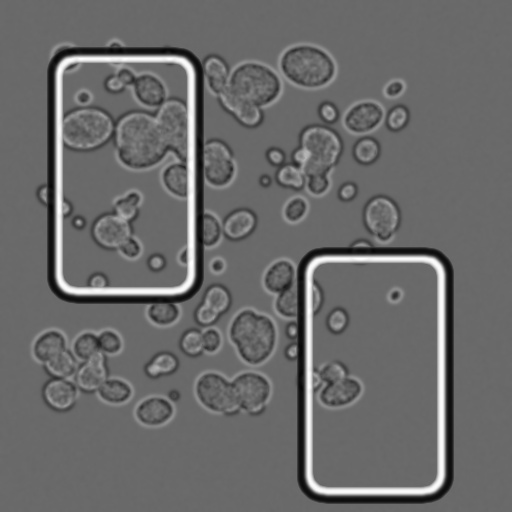

In [13]:
#@markdown ## Result

#@markdown These cells respectively
#@markdown  * list the created files, e.g. images and the json with labels,
#@markdown  * show an example synthetic image, and
#@markdown  * archive the data set to allow downloading.

#@markdown If you download the data set, this allows you to use it to train a model. Alternatively, you can also combine the training notebook with this one to skip downloading a large file.

from IPython.display import Image

Image(f"{synthetic_data_path}/train/image-1.jpg")

In [11]:
#@markdown ## Download

#@markdown The resulting file will be around 1.1-1.2 GB, so downloading takes some time. Consider mounting Google Drive and saving it there if you can affort the space.

try:
  from google.colab.files import download
  !cd '{synthetic_data_path}' && zip -r "{synthetic_data_path}/../synthetic-dataset.zip" .
  download(f"{synthetic_data_path}/../synthetic-dataset.zip")
except ImportError:
  print('Not on Google Colab, won\'t start download')

updating: train/ (stored 0%)
updating: train/image-2.jpg (deflated 2%)
updating: train/image-10.jpg (deflated 2%)
updating: train/image-9.jpg (deflated 2%)
updating: train/image-14.jpg (deflated 2%)
updating: train/image-8.jpg (deflated 2%)
updating: train/image-1.jpg (deflated 2%)
updating: train/image-3.jpg (deflated 2%)
updating: train/image-12.jpg (deflated 2%)
updating: train/image-15.jpg (deflated 2%)
updating: train/image-5.jpg (deflated 2%)
updating: train/image-11.jpg (deflated 2%)
updating: train/image-16.jpg (deflated 2%)
updating: train/image-13.jpg (deflated 2%)
updating: train/image-18.jpg (deflated 2%)
updating: train/image-4.jpg (deflated 2%)
updating: train/image-6.jpg (deflated 2%)
updating: train/image-19.jpg (deflated 2%)
updating: train/image-17.jpg (deflated 2%)
updating: train/image-7.jpg (deflated 2%)
updating: train/image-0.jpg (deflated 2%)
updating: labels.umsgpack (deflated 82%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>